In [169]:
import inspect

import numpy as np
import matplotlib.pyplot as plt

import pathlib
import PIL
import PIL.Image

import tensorflow as tf

In [348]:
data_dir = '/content/drive/My Drive/Korea_Univ/temp'

data_dir = pathlib.Path(data_dir)

list(data_dir.glob('*/*.jpg'))

[PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame0_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame79_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame163_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame184_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame219_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame240_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame261_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame275_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/1/1_ver3_LJW3_frame28_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/1/1_ver3_LJW3_frame27_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/1/1_ver3_LJW3_frame32_f

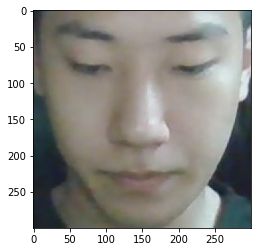

In [170]:
data_dir = '/content/drive/My Drive/Korea_Univ/temp'

data_dir = pathlib.Path(data_dir)

# 8 images / PosixPath('path')
list(data_dir.glob('*/*.jpg'))[0]

PIL.Image.open(list(data_dir.glob('*/*.jpg'))[0])

plt.imshow(np.array(PIL.Image.open(list(data_dir.glob('*/*.jpg'))[0])))

In [171]:
print(inspect.getsource(tf.keras.preprocessing.image_dataset_from_directory))

@keras_export('keras.preprocessing.image_dataset_from_directory', v1=[])
def image_dataset_from_directory(directory,
                                 labels='inferred',
                                 label_mode='int',
                                 class_names=None,
                                 color_mode='rgb',
                                 batch_size=32,
                                 image_size=(256, 256),
                                 shuffle=True,
                                 seed=None,
                                 validation_split=None,
                                 subset=None,
                                 interpolation='bilinear',
                                 follow_links=False):
  """Generates a `tf.data.Dataset` from image files in a directory.

  If your directory structure is:

  ```
  main_directory/
  ...class_a/
  ......a_image_1.jpg
  ......a_image_2.jpg
  ...class_b/
  ......b_image_1.jpg
  ......b_image_2.jpg
  ```

  Then calling `i

In [172]:
BATCH_SIZE = 2
IMAGE_SIZE = (224, 224)  # (IMG_HEIGHT, IMG_WIDTH)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=False,
    seed=112,
    validation_split=0.2,
    subset='training'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=False,
    seed=112,
    validation_split=0.2,
    subset='validation'
)

Found 16 files belonging to 2 classes.
Using 13 files for training.
Found 16 files belonging to 2 classes.
Using 3 files for validation.


In [173]:
class_names = train_ds.class_names
class_names

['0', '1']

In [174]:
print(inspect.getsource(train_ds.as_numpy_iterator))

  def as_numpy_iterator(self):
    """Returns an iterator which converts all elements of the dataset to numpy.

    Use `as_numpy_iterator` to inspect the content of your dataset. To see
    element shapes and types, print dataset elements directly instead of using
    `as_numpy_iterator`.

    >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
    >>> for element in dataset:
    ...   print(element)
    tf.Tensor(1, shape=(), dtype=int32)
    tf.Tensor(2, shape=(), dtype=int32)
    tf.Tensor(3, shape=(), dtype=int32)

    This method requires that you are running in eager mode and the dataset's
    element_spec contains only `TensorSpec` components.

    >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
    >>> for element in dataset.as_numpy_iterator():
    ...   print(element)
    1
    2
    3

    >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
    >>> print(list(dataset.as_numpy_iterator()))
    [1, 2, 3]

    `as_numpy_iterator()` will preserve the

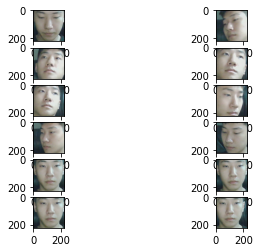

In [175]:
# list(train_ds.as_numpy_iterator())[0]: first batch
# list(train_ds.as_numpy_iterator())[0][0]: pixel value (two(batch_size) image)
# list(train_ds.as_numpy_iterator())[0][0][0]: first image

# plt.figure(figsize=(10, 10))
for i in range(len(train_ds)-1):
    for j in range(len(list(train_ds.as_numpy_iterator())[i])):
        plt.subplot(6, 2, 2*i + j + 1)
        plt.imshow(list(train_ds.as_numpy_iterator())[i][0][j].astype('uint8'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


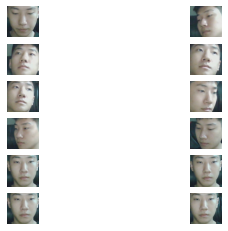

In [176]:
for i in range(6):
  for images, labels in train_ds.take(i+1):
    for j in range(2):
        ax = plt.subplot(6, 2, 2*i + j + 1)
        plt.imshow(images[j].numpy().astype('uint8'))
        plt.axis('off')

# 새로운 접근

In [349]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame0_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame79_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame163_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame184_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame219_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame240_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame261_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/0/0_free_ver3_LJW1_frame275_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/1/1_ver3_LJW3_frame28_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/1/1_ver3_LJW3_frame27_facelm.jpg'),
 PosixPath('/content/drive/My Drive/Korea_Univ/temp/1/1_ver3_LJW3_frame32_f

In [256]:
BATCH_SIZE = 2
IMAGE_SIZE = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    # batch_size=BATCH_SIZE,
    # image_size=IMAGE_SIZE,
    shuffle=False,
    seed=112,
    validation_split=0.2,
    subset='training'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    # batch_size=BATCH_SIZE,
    # image_size=IMAGE_SIZE,
    shuffle=False,
    seed=112,
    validation_split=0.2,
    subset='validation'
)

Found 16 files belonging to 2 classes.
Using 13 files for training.
Found 16 files belonging to 2 classes.
Using 3 files for validation.


In [257]:
add_noise = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(0.05)
])

In [258]:
def augment(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
  image = (image / 255.0)
  image = tf.image.random_flip_left_right(image)
  # image = tf.image.random_brightness(image, max_delta=0.5)
  # image = tf.image.random_contrast(image, 0.5, 1.5)
  # image = tf.image.random_hue(image, 0.2)  #  색조, 0 < x < 0.5
  # image = tf.image.random_saturation(image, 5, 10)  # 채도

  image = add_noise(image, training=True)
  
  image = tf.clip_by_value(image, 0, 1)  # https://stackoverrun.com/ko/q/12304559
  
  return image, label

In [346]:
data_dir

PosixPath('/content/drive/My Drive/Korea_Univ/temp')

In [344]:
data_dir = '/content/drive/My Drive/Korea_Univ/temp'
data_dir = pathlib.Path(data_dir)



BATCH_SIZE = 2
IMAGE_SIZE = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    # batch_size=BATCH_SIZE,
    # image_size=IMAGE_SIZE,
    shuffle=False,
    seed=112,
    validation_split=0.2,
    subset='training'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    # batch_size=BATCH_SIZE,
    # image_size=IMAGE_SIZE,
    shuffle=False,
    seed=112,
    validation_split=0.2,
    subset='validation'
)



add_noise = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(0.07)
])

def augment(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
  image = (image / 255.0)
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_brightness(image, max_delta=0.15)
  # image = tf.image.random_contrast(image, 0.5, 1.5)
  image = tf.image.random_hue(image, 0.05)  #  색조, 0 < x < 0.5
  image = tf.image.random_saturation(image, 0.7, 2.3)  # 채도 2.5

  image = add_noise(image, training=True)
  
  image = tf.clip_by_value(image, 0, 1)  # https://stackoverrun.com/ko/q/12304559
  
  return image, label



AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

val_ds = (
    val_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

Found 16 files belonging to 2 classes.
Using 13 files for training.
Found 16 files belonging to 2 classes.
Using 3 files for validation.


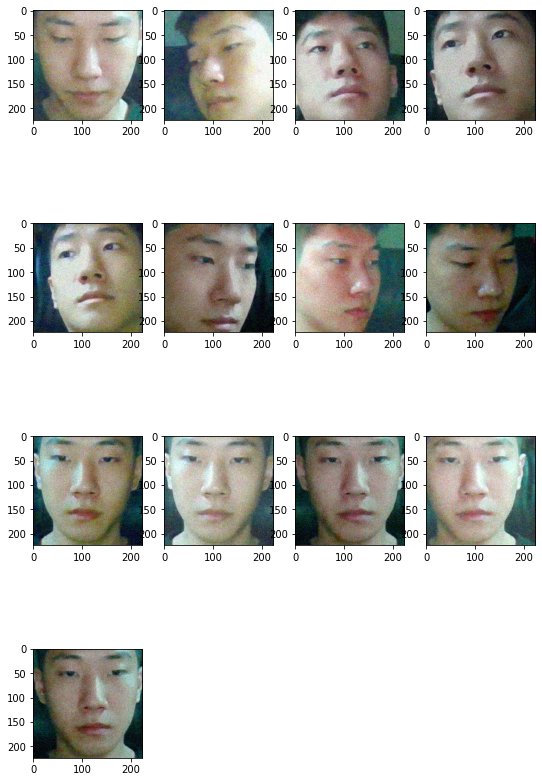

In [345]:
plt.figure(figsize=(9, 15))
for i in range(13):
  plt.subplot(4, 4, i + 1)
  plt.imshow(list(train_ds.as_numpy_iterator())[0][0][0][i])

In [326]:
print(inspect.getsource(tf.image.random_brightness))

@tf_export('image.random_brightness')
@dispatch.add_dispatch_support
def random_brightness(image, max_delta, seed=None):
  """Adjust the brightness of images by a random factor.

  Equivalent to `adjust_brightness()` using a `delta` randomly picked in the
  interval `[-max_delta, max_delta)`.

  Args:
    image: An image or images to adjust.
    max_delta: float, must be non-negative.
    seed: A Python integer. Used to create a random seed. See
      `tf.compat.v1.set_random_seed` for behavior.

  Usage Example:

  >>> x = [[[1.0, 2.0, 3.0],
  ...       [4.0, 5.0, 6.0]],
  ...      [[7.0, 8.0, 9.0],
  ...       [10.0, 11.0, 12.0]]]
  >>> tf.image.random_brightness(x, 0.2)
  <tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=...>

  Returns:
    The brightness-adjusted image(s).

  Raises:
    ValueError: if `max_delta` is negative.
  """
  if max_delta < 0:
    raise ValueError('max_delta must be non-negative.')

  delta = random_ops.random_uniform([], -max_delta, max_delta, seed=seed)

In [279]:
list(train_ds.as_numpy_iterator())[0][0].shape

for i, j in train_ds.take(1):
  print(i.shape)
  print(j.shape)
  break

(1, 13, 224, 224, 3)
(1, 13)
